In [33]:
import os
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Define paths (update if in Google Drive)
data_dirs = [
    '/content/Audio_Speech_Actors_01-24',
    '/content/Audio_Song_Actors_01-24'
]  # Use '/content/drive/MyDrive/...' if in Google Drive

# Define emotion mapping (RAVDESS standard)
emotion_map = {
    1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad',
    5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'
}
labels_map = {v: k-1 for k, v in emotion_map.items()}  # Map emotions to indices (0-based)

In [35]:
def get_emotion_from_filename(file):
    try:
        # RAVDESS filename format: 03-01-XX-01-01-01-01.wav (XX is emotion code)
        emotion_code = int(file.split('-')[2])
        return emotion_map.get(emotion_code, None)
    except:
        return None

# Collect emotions for all files
def get_emotion_distribution(file_paths):
    emotions = []
    for file_path in file_paths:
        emotion = get_emotion_from_filename(os.path.basename(file_path))
        if emotion:
            emotions.append(emotion)
    return emotions

# Get emotion distributions
speech_emotions = get_emotion_distribution(speech_files)
song_emotions = get_emotion_distribution(song_files)

# Count emotions
speech_counts = Counter(speech_emotions)
song_counts = Counter(song_emotions)
print("Speech Emotion Counts:", dict(speech_counts))
print("Song Emotion Counts:", dict(song_counts))

Speech Emotion Counts: {'fearful': 192, 'angry': 192, 'sad': 192, 'disgust': 192, 'happy': 192, 'neutral': 96, 'calm': 192, 'surprised': 192}
Song Emotion Counts: {'calm': 184, 'sad': 184, 'fearful': 184, 'happy': 184, 'angry': 184, 'neutral': 92}


##Visualize Emotion Distribution

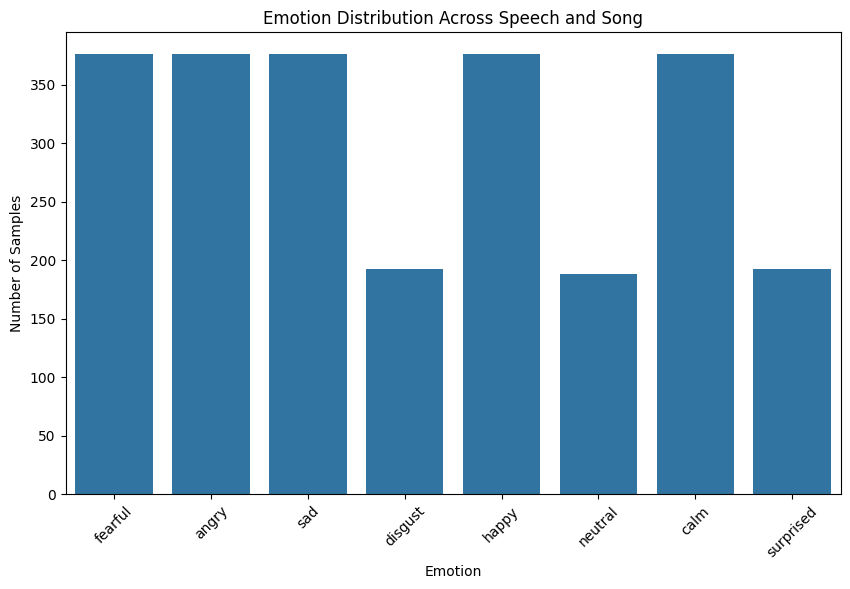

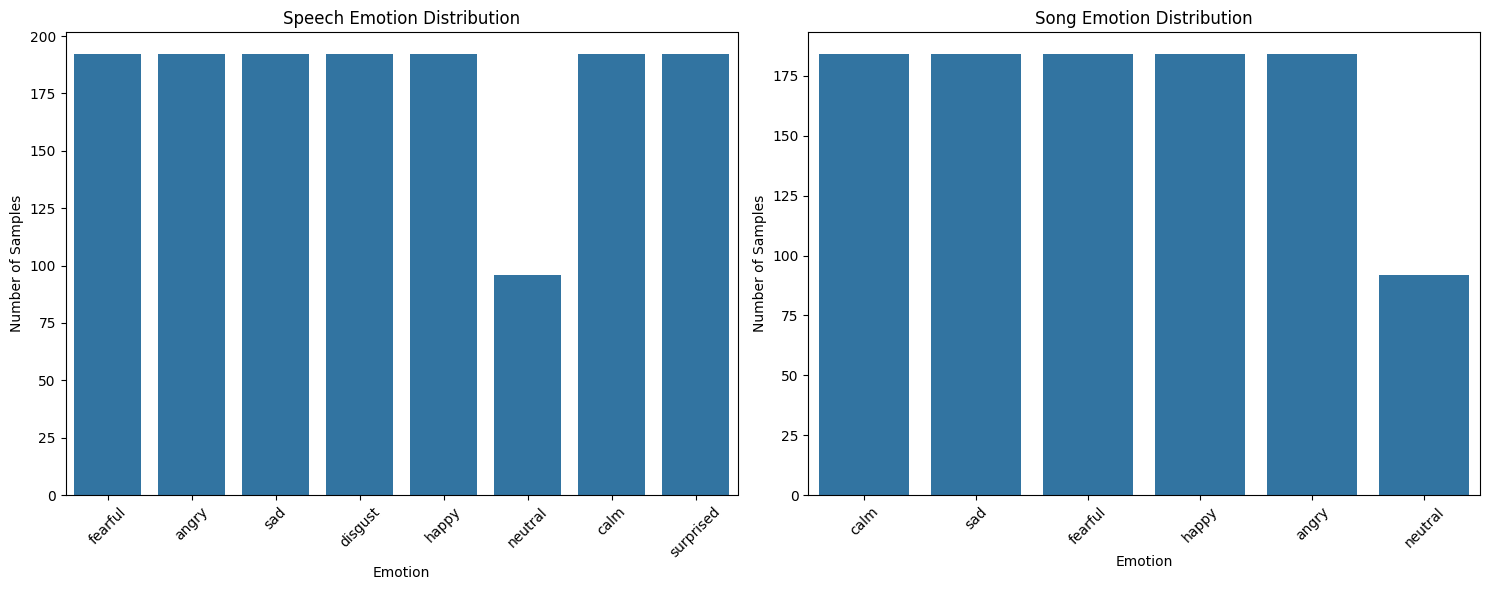

In [36]:
# Combine counts for visualization
all_emotions = speech_emotions + song_emotions
emotion_counts = Counter(all_emotions)

# Plot emotion distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=list(emotion_counts.keys()), y=list(emotion_counts.values()))
plt.title('Emotion Distribution Across Speech and Song')
plt.xlabel('Emotion')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.show()

# Separate plots for speech and song
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(x=list(speech_counts.keys()), y=list(speech_counts.values()), ax=ax1)
ax1.set_title('Speech Emotion Distribution')
ax1.set_xlabel('Emotion')
ax1.set_ylabel('Number of Samples')
ax1.tick_params(axis='x', rotation=45)

sns.barplot(x=list(song_counts.keys()), y=list(song_counts.values()), ax=ax2)
ax2.set_title('Song Emotion Distribution')
ax2.set_xlabel('Emotion')
ax2.set_ylabel('Number of Samples')
ax2.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

##Analyze Audio File Properties

Speech Audio Properties:
Durations (seconds): Mean=3.74, Std=0.47, Min=3.24, Max=4.84
Sample Rates (Hz): {48000}


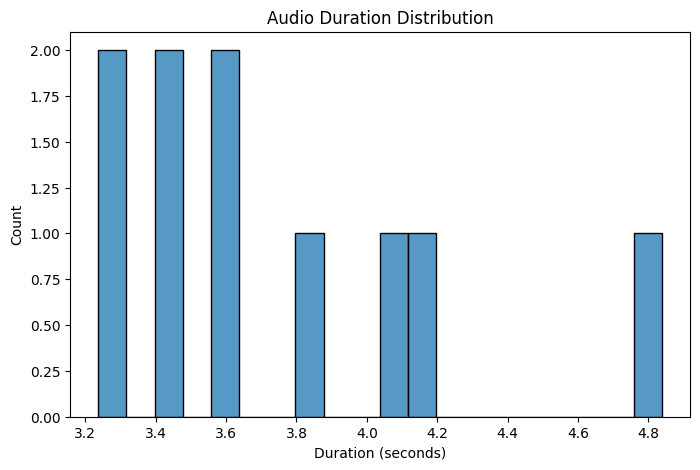


Song Audio Properties:
Durations (seconds): Mean=4.59, Std=0.41, Min=4.10, Max=5.37
Sample Rates (Hz): {48000}


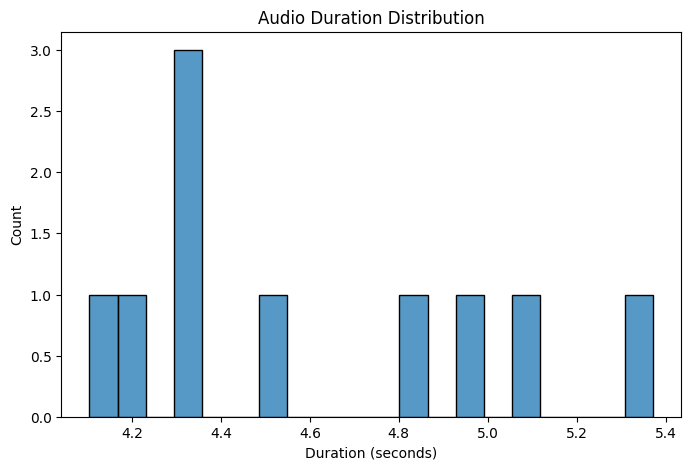

In [37]:
def analyze_audio_properties(file_paths, sample_size=10):
    durations = []
    sample_rates = []

    # Sample a subset to avoid long processing
    sample_files = np.random.choice(file_paths, min(sample_size, len(file_paths)), replace=False)

    for file_path in sample_files:
        try:
            audio, sr = librosa.load(file_path, sr=None)  # Load with native sampling rate
            duration = librosa.get_duration(y=audio, sr=sr)
            durations.append(duration)
            sample_rates.append(sr)
        except Exception as e:
            print(f"Error processing {file_path}: {e}")

    print(f"Durations (seconds): Mean={np.mean(durations):.2f}, Std={np.std(durations):.2f}, Min={np.min(durations):.2f}, Max={np.max(durations):.2f}")
    print(f"Sample Rates (Hz): {set(sample_rates)}")

    # Plot duration distribution
    plt.figure(figsize=(8, 5))
    sns.histplot(durations, bins=20)
    plt.title('Audio Duration Distribution')
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Count')
    plt.show()

# Analyze properties for speech and song
print("Speech Audio Properties:")
analyze_audio_properties(speech_files)
print("\nSong Audio Properties:")
analyze_audio_properties(song_files)

##Visualize Audio Waveforms and Features

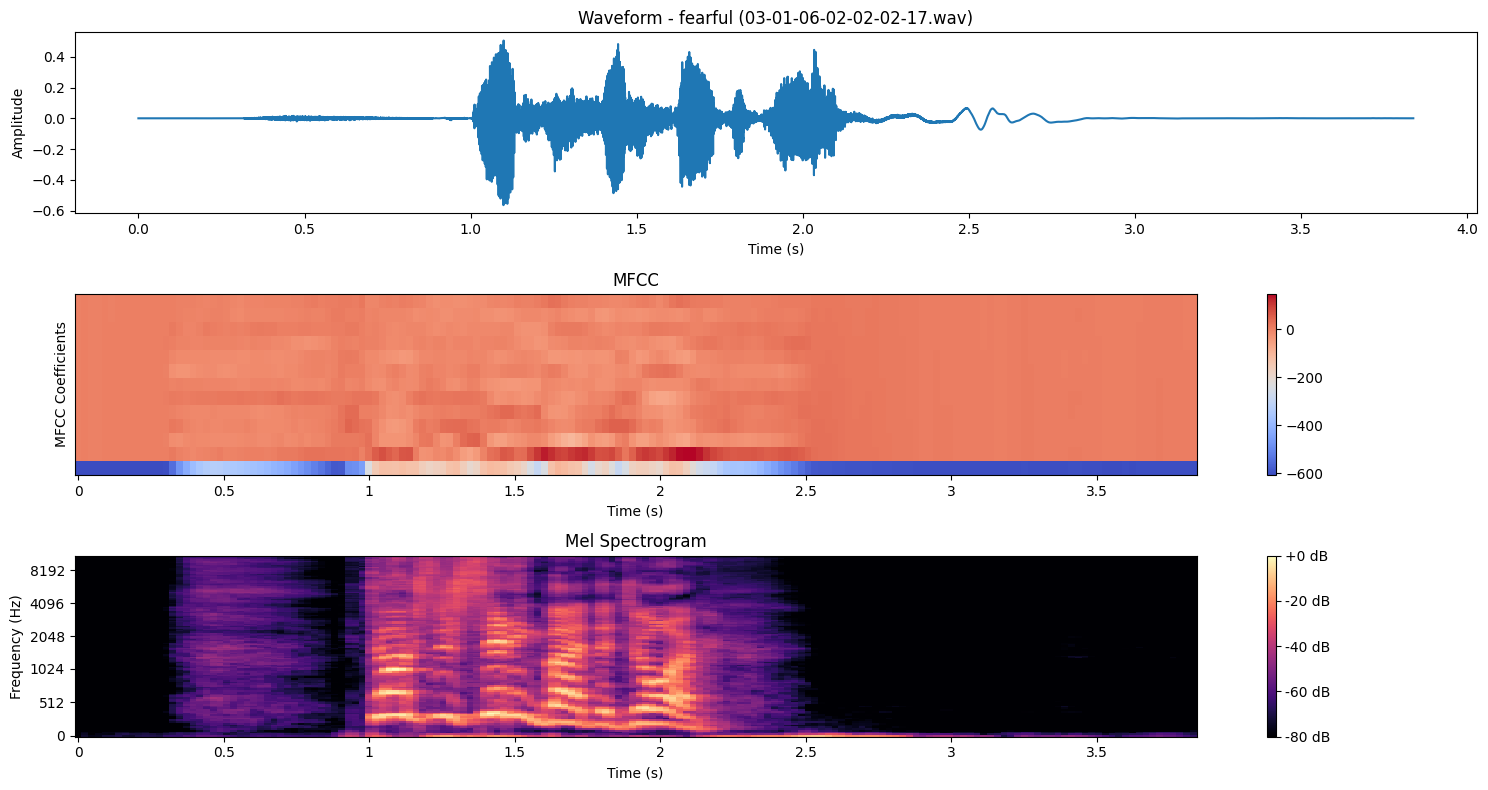

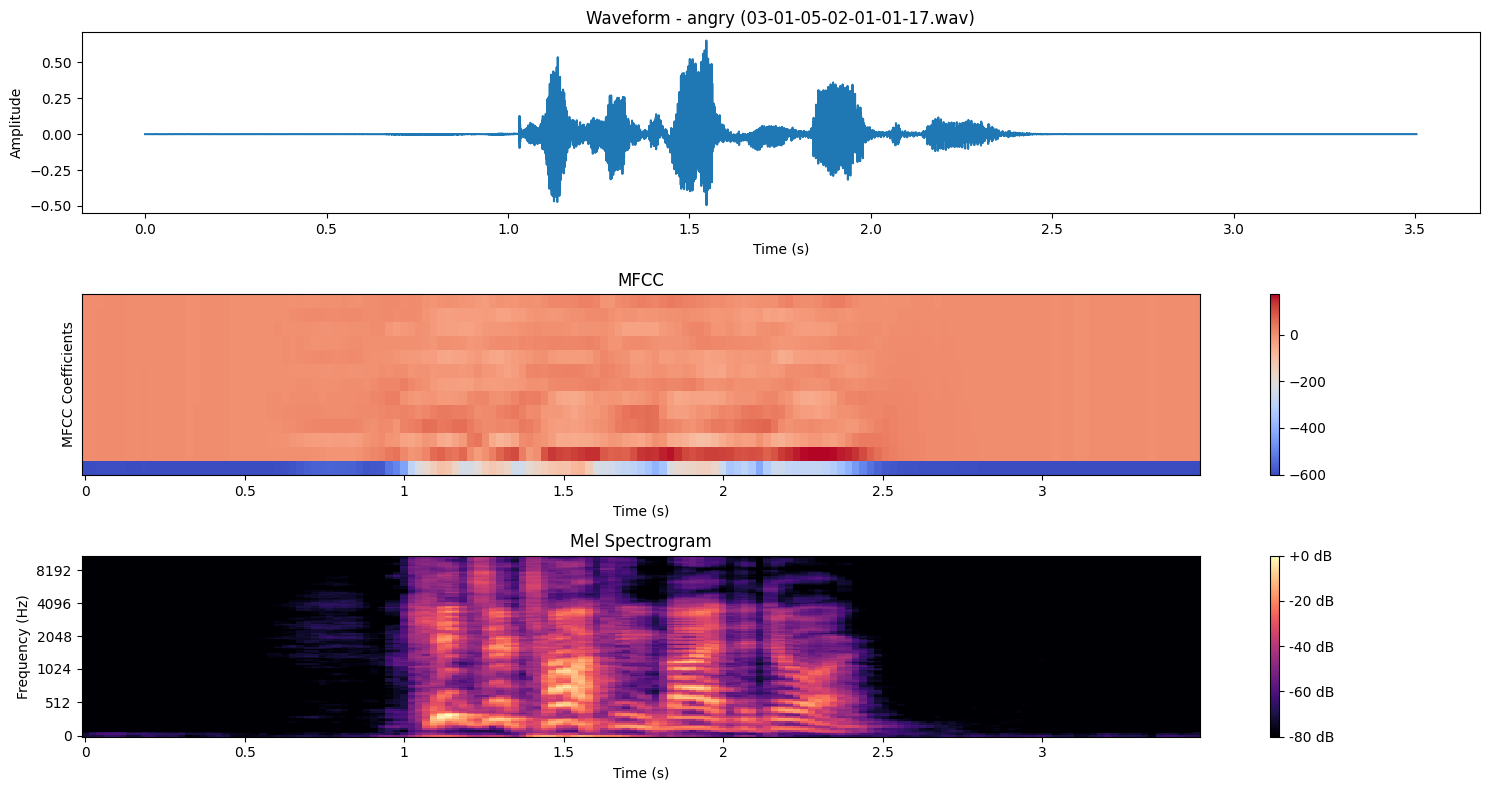

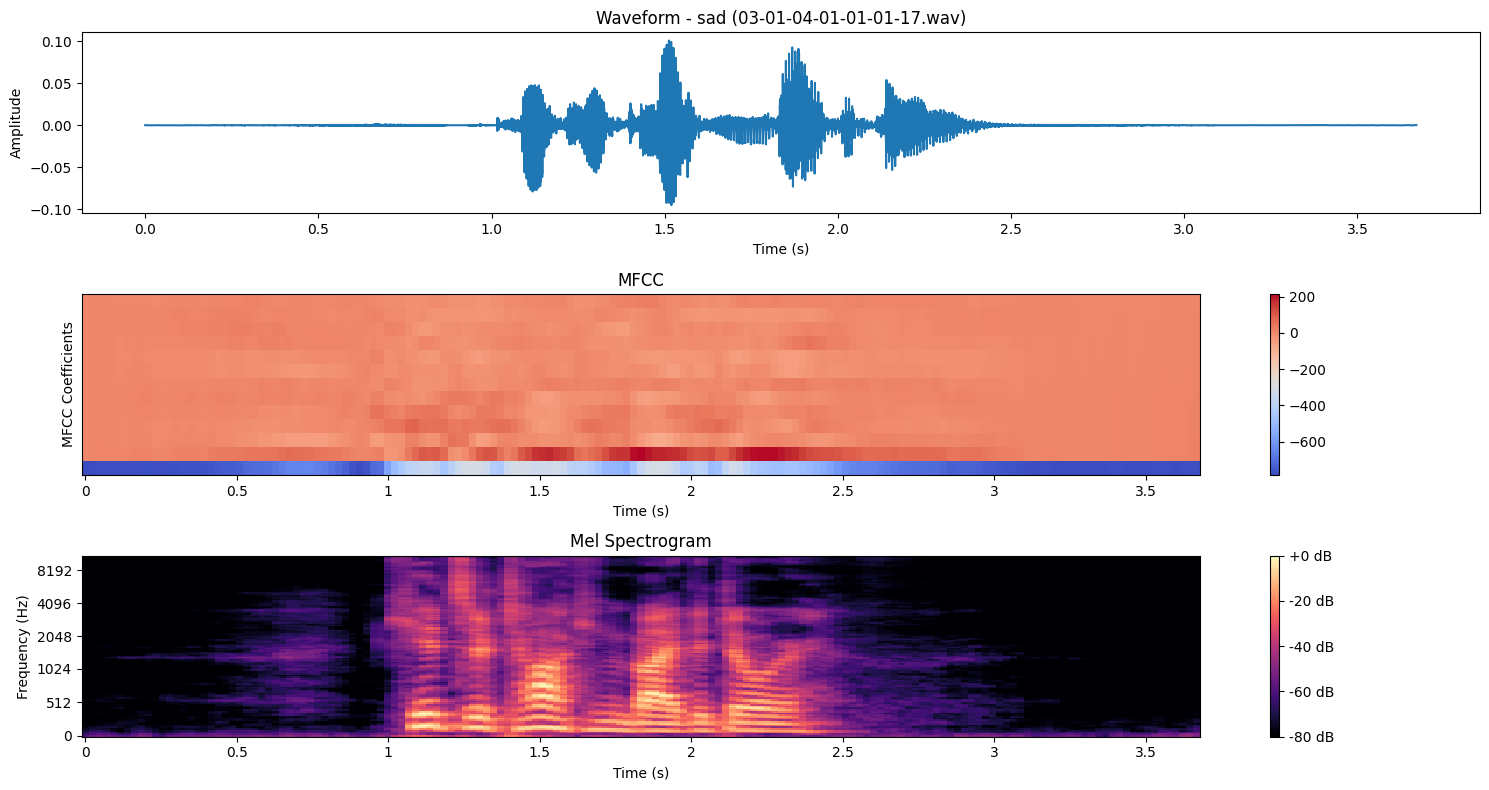

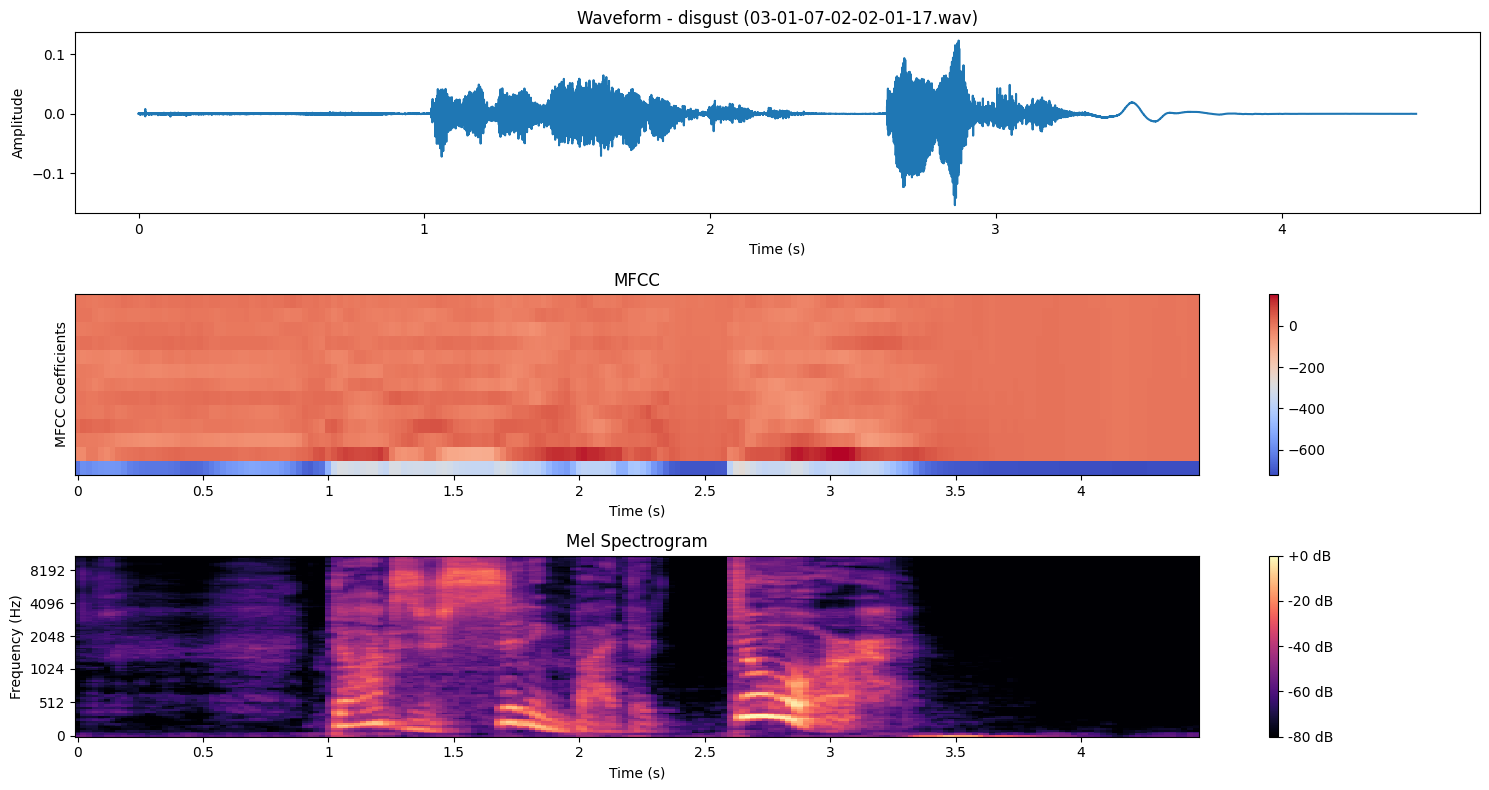

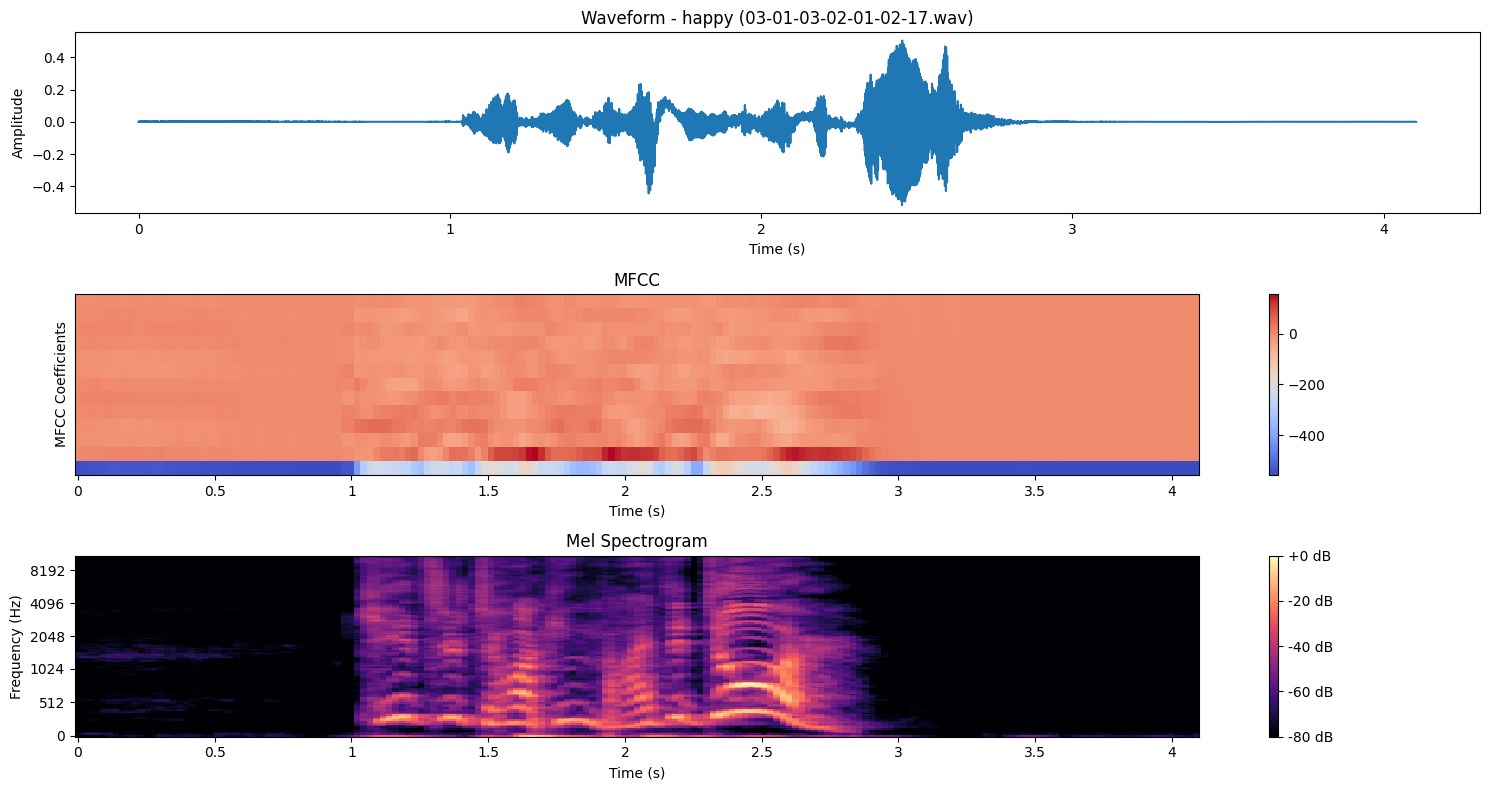

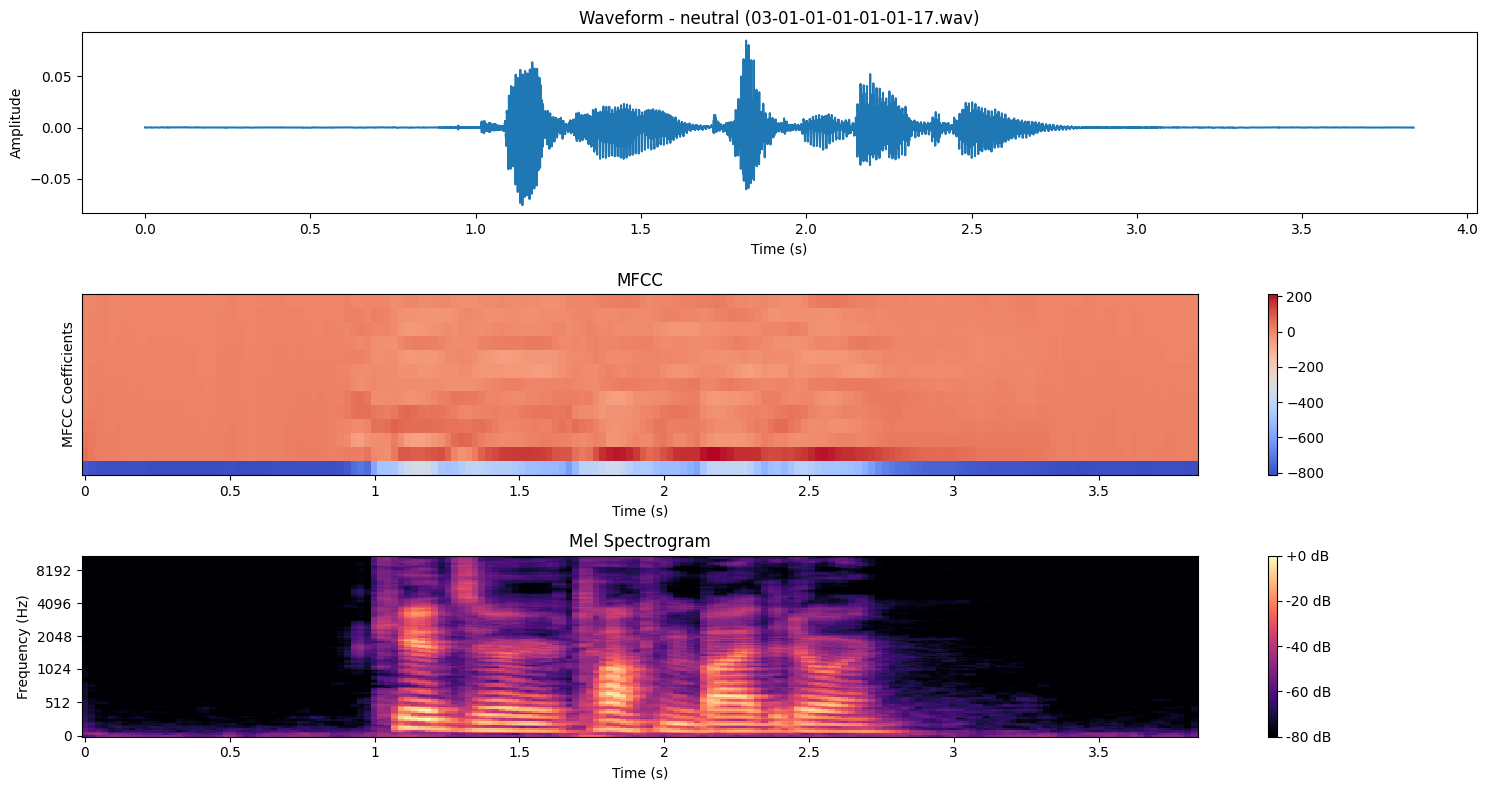

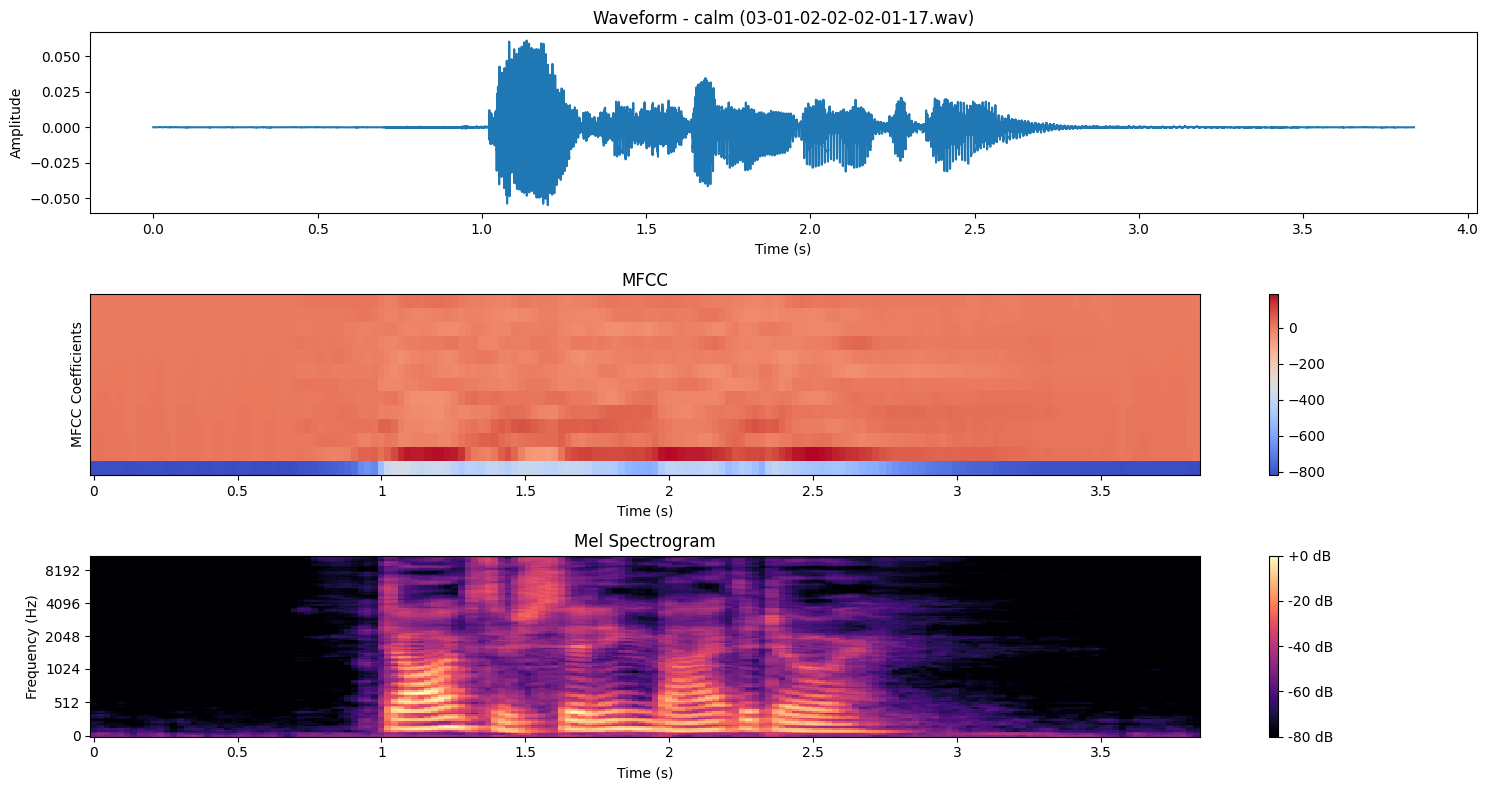

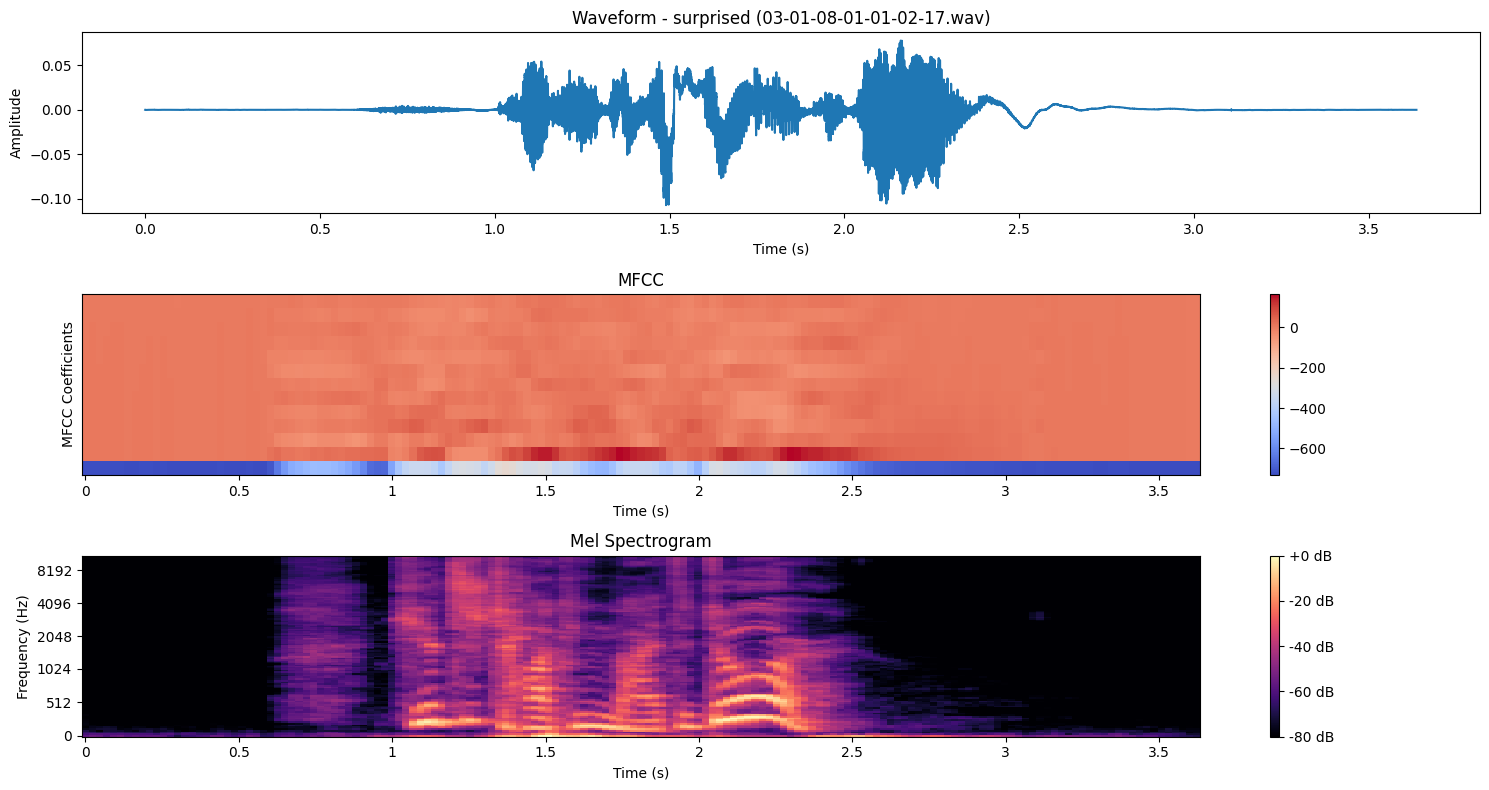

In [38]:
def plot_audio_features(file_path, emotion):
    try:
        # Load audio
        audio, sr = librosa.load(file_path, sr=22050)

        # Plot waveform
        plt.figure(figsize=(15, 8))

        plt.subplot(3, 1, 1)
        plt.plot(np.arange(len(audio)) / sr, audio)
        plt.title(f'Waveform - {emotion} ({os.path.basename(file_path)})')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')

        # Plot MFCC
        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
        plt.subplot(3, 1, 2)
        librosa.display.specshow(mfcc, sr=sr, x_axis='time')
        plt.colorbar()
        plt.title('MFCC')
        plt.xlabel('Time (s)')
        plt.ylabel('MFCC Coefficients')

        # Plot Mel Spectrogram
        mel = librosa.feature.melspectrogram(y=audio, sr=sr)
        plt.subplot(3, 1, 3)
        librosa.display.specshow(librosa.power_to_db(mel, ref=np.max), sr=sr, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Mel Spectrogram')
        plt.xlabel('Time (s)')
        plt.ylabel('Frequency (Hz)')

        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Plot features for one sample per emotion
emotion_samples = {}
for file_path in speech_files + song_files:
    emotion = get_emotion_from_filename(os.path.basename(file_path))
    if emotion and emotion not in emotion_samples:
        emotion_samples[emotion] = file_path
for emotion, file_path in emotion_samples.items():
    plot_audio_features(file_path, emotion)